# Install Dependencies and Get Data

In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [10]:
os.path.join('jigsaw-toxic-comment-classification-challenge', 'train.csv', 'train.csv')

'jigsaw-toxic-comment-classification-challenge\\train.csv\\train.csv'

In [11]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge', 'train.csv', 'train.csv'))

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.iloc[15]['comment_text']

'"\n\nJuelz Santanas Age\n\nIn 2002, Juelz Santana was 18 years old, then came February 18th, which makes Juelz turn 19 making songs with The Diplomats. The third neff to be signed to Cam\'s label under Roc A Fella. In 2003, he was 20 years old coming out with his own singles ""Santana\'s Town"" and ""Down"". So yes, he is born in 1983. He really is, how could he be older then Lloyd Banks? And how could he be 22 when his birthday passed? The homie neff is 23 years old. 1983 - 2006 (Juelz death, god forbid if your thinking about that) equals 23. Go to your caculator and stop changing his year of birth. My god."'

In [7]:
df[df['severe_toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0


In [8]:
df[df.columns[2:]].iloc[6]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

# Pre-Process

In [12]:
from tensorflow.keras.layers import TextVectorization

In [13]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [14]:
# Number of words in the vocabulary
MAX_FEATURES = 200000

In [15]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [16]:
vectorizer.adapt(X.values)

In [14]:
vectorizer('Hello world, I am learning')

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([286, 261,   8, ...,   0,   0,   0], dtype=int64)>

In [15]:
vectorizer_text = vectorizer(X.values)

In [16]:
vectorizer_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2506, ...,     0,     0,     0],
       [  425,   440,    70, ...,     0,     0,     0],
       ...,
       [32141,  7329,   383, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [17]:
# MCSHBAP - map, cache, shuffle, batch, prefetch from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorizer_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # Helps prevent bottlenecks

In [18]:
dataset.as_numpy_iterator().next()

(array([[ 311, 2471,   75, ...,    0,    0,    0],
        [ 204,  165,  509, ...,    0,    0,    0],
        [1826, 1062,  208, ...,    0,    0,    0],
        ...,
        [3545, 1527,  207, ...,    0,    0,    0],
        [   8,   72,   10, ...,    0,    0,    0],
        [ 980,  848,   46, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [19]:
train = dataset.take(int(len(dataset)*.7))
validation = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [20]:
train_generator = train.as_numpy_iterator()

In [21]:
train_generator.next()

(array([[   192,    286, 164477, ...,      0,      0,      0],
        [    41,      9,     49, ...,      0,      0,      0],
        [  4423,      8,    194, ...,      0,      0,      0],
        ...,
        [195077,     11,   1072, ...,      0,      0,      0],
        [   192,    286,      5, ...,      0,      0,      0],
        [  2354,    102,   1562, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# Build a Sequential Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [23]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [24]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [26]:
history = model.fit(train, epochs=1, validation_data=validation)

6981/6981 [==============================] - 9030s 1s/step - loss: 0.0671 - val_loss: 0.0530


In [27]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

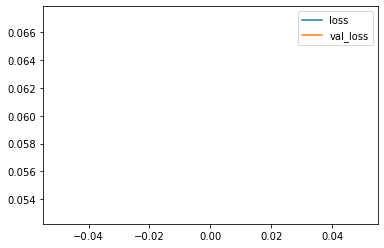

In [28]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# Make Predictions

In [29]:
input_text = vectorizer('You are a shitty person!')

In [30]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [31]:
(model.predict(batch_X) > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [32]:
result = model.predict(batch_X)

# Evaluate Model

In [33]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [34]:
precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    #Make a prediction
    yhat = model.predict(X_true)
    
    #Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    precision.update_state(y_true, yhat)
    recall.update_state(y_true, yhat)
    accuracy.update_state(y_true, yhat)

In [46]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}')

Precision: 0.8397356271743774, Recall: 0.5991747975349426, Accuracy: 0.4282848536968231


# Test and Gradio

In [37]:
!pip install gradio jinja2

  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=37712bf1ca70aadede473ba9c82c3dd99075143a5a404fc88d7792af4a697c60
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\91\e2\96\f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=584b1e5bf45dbacb0cc389b784db01720c8f07d8629756e1886b936555341b95
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\fe\04\d1\a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built ffmpy python-multipart
  Attempting uninstall: anyio
    Found existing installation: anyio 2.2.0
    Uninstalling anyio-2.2.0:
      Successfully uninstalled anyio-2.2.0


In [51]:
!pip install gradio

In [3]:
import gradio as gr

In [40]:
model.save('toxicity.h5')

In [6]:
model = tf.keras.models.load_model('toxicity.h5')

In [17]:
input_str = vectorizer('I fucking hate you, I will kill you!')

In [18]:
result = model.predict(np.expand_dims(input_str,0))

In [19]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [20]:
result

array([[0.9975492 , 0.4616702 , 0.963796  , 0.09422812, 0.87728536,
        0.35960189]], dtype=float32)

In [21]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text=''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
        
    return text 

In [22]:
interface = gr.Interface(fn = score_comment, inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score') , outputs='text')

In [23]:
interface.launch(share = True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://36588.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x995fca0>,
 'http://127.0.0.1:7860/',
 'https://36588.gradio.app')